<a href="https://colab.research.google.com/github/yanimaila/Studi-Independen/blob/main/Materi/PCA_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Yani Maila Santi

Class : JumaTec


# Demonstration of PCA

## Learning objectives



1.   Memahami dan menafsirkan korelasi antara fitur yang berbeda dari kumpulan data.
2.   Menerapkan PCA pada dataset dunia nyata dan memahami berapa banyak data yang disimpan di komponen mana.
3. Memvisualisasikan data berdimensi tinggi dengan terlebih dahulu mereduksinya menjadi dua dimensi dengan menggunakan PCA dan kemudian memplotnya.
4. Mengamati bagaimana kinerja model bervariasi dengan jumlah komponen prinsip yang digunakan.







Dua dari penggunaan PCA adalah untuk memvisualisasikan kumpulan data berdimensi tinggi dan meningkatkan kecepatan pelatihan model pembelajaran mesin. Dalam notebook ini, kami akan menunjukkan bagaimana PCA membantu kami dengan keduanya.

Kami akan menganalisis dataset kanker payudara dari sklearn. Pertama-tama kita akan memuat dataset dan membaginya menjadi set pelatihan dan pengujian. Kemudian, kami akan melakukan regresi logistik pada set pelatihan dan mengevaluasi model kami pada set pengujian. Setelah melakukan itu, kami akan memvisualisasikan dan menganalisis korelasi dalam data. Kami akan mengeksplorasi bagaimana PCA membantu kami mengompresi data dan memproyeksikannya ke dalam dua dimensi sehingga kami dapat memplotnya. Terakhir, kami akan melakukan regresi logistik pada data terkompresi dan melihat bagaimana hal itu bertumpuk terhadap kinerja model pada data asli.

Mari kita impor dulu paket-paket yang kita butuhkan.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

%matplotlib inline

Kami akan menggunakan dataset kanker payudara dari sklearn di notebook ini. Dataset ini berisi informasi tentang tumor ganas dan jinak. Kami bertujuan untuk membuat model yang dapat mengklasifikasikan tumor sebagai ganas atau jinak.

## Loading The Dataset

Untuk memulai, kami akan memuat dataset dan mencetak deskripsi singkat tentangnya. Anda dianjurkan untuk membaca deskripsi sebelum melanjutkan.

In [2]:
dat = datasets.load_breast_cancer()
print(dat.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

Kami sekarang akan memuat data ke dalam kerangka data dan mencetak 5 entri pertama. Bisakah Anda menebak bagaimana beberapa atribut ini mungkin terkait? Misalnya, dapatkah mean radius dan mean perimeter dihubungkan?

In [3]:
df_all = pd.DataFrame(dat['data'], columns=list(dat['feature_names']))
df_all.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Creating Train and Test Sets

Untuk memungkinkan model kami membuat prediksi apakah tumor ganas atau jinak, kami perlu melatihnya dari beberapa data. Namun, untuk kemudian mengevaluasi kinerja model kami, kami perlu memeriksa apakah itu mengklasifikasikan data yang tidak terlihat dengan benar. Itulah sebabnya kami membagi data yang kami miliki menjadi dua set - set pelatihan dan set pengujian. Kami melatih parameter untuk model dengan menggunakan set pelatihan dan kemudian mengevaluasi seberapa baik model menggunakan set tes.

Kami mengambil 70% sampel ke dalam set pelatihan dan 30% ke dalam set uji, yang merupakan ukuran konvensional untuk set data yang kami miliki.

In [4]:
# We do a 70/30 split
TEST_SIZE_RATIO = 0.3

# Setting up X and y
X = df_all
y = pd.Series(list(dat['target']))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE_RATIO, random_state=0)

# Normalizing the data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print("X_train.shape, y_train.shape", X_train.shape, y_train.shape)
print("X_test.shape, y_test.shape", X_test.shape, y_test.shape)

X_train.shape, y_train.shape (398, 30) (398,)
X_test.shape, y_test.shape (171, 30) (171,)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  FutureWarning,


## Performing Logistic Regression

Kami sekarang akan melakukan Regresi Logistik pada data yang tidak dimodifikasi. Bagi Anda yang belum tahu tentang Logistic Regression, ini adalah teknik yang memungkinkan kita mengklasifikasikan data ke dalam kelas yang berbeda. Misalnya, kita bisa mendapatkan gambar buah dan mencoba mengklasifikasikan apakah itu jeruk atau apel. Dalam hal ini kelasnya adalah jeruk dan apel.

Dalam hal ini, kelasnya ganas (diwakili oleh angka 0) dan jinak (diwakili oleh angka 1). Berdasarkan data, kami akan mencoba mengklasifikasikan tumor sebagai ganas atau jinak.

Untuk mengevaluasi kinerja model, kami akan menggunakan metrik yang disebut `skor f1`, yang menilai seberapa baik kinerja model dalam memprediksi apakah tumor ganas atau jinak dan memberikan skor numerik berdasarkan itu. Kami bertujuan untuk mendapatkan skor f1 setinggi mungkin.

In [5]:
model = LogisticRegression(random_state=0).fit(X_train, y_train)
print("Training score: ", f1_score(y_train, model.predict(X_train)))
print("Testing score: ", f1_score(y_test, model.predict(X_test)))

Training score:  0.99203187250996
Testing score:  0.981651376146789


Ketika kami melatih model pada data awal (dinormalisasi), kami mendapatkan skor set tes 98,17%.

## Visualizing Correlation of the Features

Kami berharap beberapa fitur sangat berkorelasi satu sama lain. Mari kita buat peta panas yang memungkinkan kita memvisualisasikan korelasi antara fitur yang berbeda.

Kode untuk fungsi berikut telah diambil dari [ini](https://colab.research.google.com/github/gal-a/blog/blob/master/docs/notebooks/sklearn/sklearn_logistic_regression_vs_gbm.ipynb#scrollTo= ayp_TDIq6qJj) buku catatan.

Function correlation_matrix: X.shape, y.shape, yX.shape: (569, 30) (569,) (569, 31)



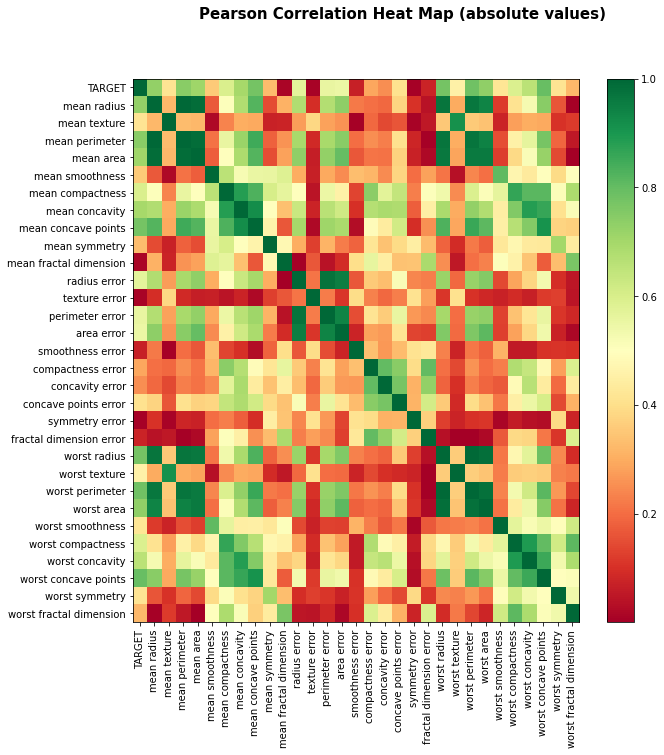

In [6]:
def correlation_matrix(y, X, is_plot=False):
  # Calculate and plot the correlation symmetrical matrix
  # Return:
  # yX - concatenated data
  # yX_corr - correlation matrix, pearson correlation of values from -1 to +1
  # yX_abs_corr - correlation matrix, absolute values
  
  yX = pd.concat([y, X], axis=1)
  yX = yX.rename(columns={0: 'TARGET'})  # rename first column

  print("Function correlation_matrix: X.shape, y.shape, yX.shape:", X.shape, y.shape, yX.shape)
  print()

  # Get feature correlations and transform to dataframe
  yX_corr = yX.corr(method='pearson')

  # Convert to abolute values
  yX_abs_corr = np.abs(yX_corr) 
  
  if is_plot:
    plt.figure(figsize=(10, 10))
    plt.imshow(yX_abs_corr, cmap='RdYlGn', interpolation='none', aspect='auto')
    plt.colorbar()
    plt.xticks(range(len(yX_abs_corr)), yX_abs_corr.columns, rotation='vertical')
    plt.yticks(range(len(yX_abs_corr)), yX_abs_corr.columns);
    plt.suptitle('Pearson Correlation Heat Map (absolute values)', fontsize=15, fontweight='bold')
    plt.show()
  
  return yX, yX_corr, yX_abs_corr

# Build the correlation matrix for the train data
yX, yX_corr, yX_abs_corr = correlation_matrix(y, X, is_plot=True) 

Label `TARGET` di atas mengacu pada apakah tumor itu ganas(0) atau jinak(1). Sel hijau menunjukkan korelasi yang sangat tinggi sedangkan sel darah merah menunjukkan korelasi yang sangat rendah.

Dari grafik di atas, kita dapat melihat bahwa `jari-jari rata-rata` dan `keliling rata-rata` berkorelasi sangat kuat satu sama lain (korelasi hampir sama dengan 1). `jari-jari rata-rata` dan `luas rata-rata` juga sangat terkait erat satu sama lain. Namun, `dimensi fraktal terburuk` dan `jari-jari rata-rata` sama sekali tidak berhubungan satu sama lain (korelasi hampir sama dengan 0). Dapatkah Anda mengidentifikasi beberapa fitur lain yang sangat terkait atau tidak terkait satu sama lain?

Kami dapat menghapus beberapa fitur ini dan menggabungkan yang lain dan masih kehilangan sedikit informasi. Inilah yang akan kita lakukan di bagian selanjutnya ketika kita menerapkan PCA ke data.

## Performing PCA on the Dataset

Kami sekarang akan melakukan PCA pada set pelatihan kami. Ini dapat dilakukan dengan mudah menggunakan perpustakaan sklearn. Perhatikan bahwa eigenbasis dihitung hanya dengan menggunakan titik data dalam set pelatihan. Ini karena model juga harus berkinerja baik pada data yang tidak terlihat. Jika kita memasukkan data tentang kumpulan tes ketika kita menemukan basis eigen, maka model kita mungkin menjadi bias dan kumpulan tes tidak akan lagi memberikan penilaian yang tidak bias dari model kita.

Kami telah menormalkan data sebelumnya dan karenanya kami tidak perlu menormalkannya lagi.

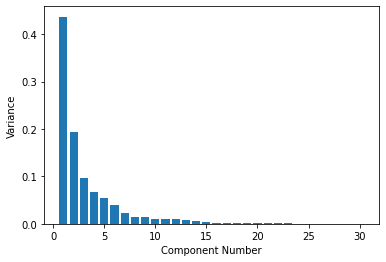

In [7]:
# Applying PCA
pca = PCA()
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)

# Plotting the amount of information stored in each component
plt.ylabel('Variance')
plt.xlabel('Component Number')
plt.bar(np.arange(30) + 1, pca.explained_variance_ratio_)
plt.show()

Seperti yang Anda lihat, jumlah informasi yang disimpan dalam suatu komponen sangat tinggi untuk beberapa dimensi pertama, tetapi kemudian turun dengan sangat cepat. Hanya 1,4% dari varians yang disimpan di komponen ke-7. Selain itu, turun menjadi 0,25% sama sekali tidak signifikan dalam komponen ke-16. Kami mempertahankan hampir 85% varians data asli dengan hanya menggunakan 5 komponen, yang merupakan seperenam dari jumlah fitur data asli.

Kami sedang mencetak nilai numerik dari varians yang disimpan di setiap komponen di bawah ini, jika Anda ingin melihatnya.

In [8]:
print(pca.explained_variance_ratio_)

[4.36893153e-01 1.94151626e-01 9.66154484e-02 6.71661075e-02
 5.49883033e-02 4.01225718e-02 2.18306816e-02 1.48922601e-02
 1.37410827e-02 1.10137130e-02 1.04826288e-02 9.16214247e-03
 7.66306051e-03 5.14226331e-03 3.19635178e-03 2.51968451e-03
 1.92415148e-03 1.65844223e-03 1.49026749e-03 1.06777316e-03
 1.01725216e-03 8.48954816e-04 7.43492725e-04 5.81295611e-04
 5.44222785e-04 2.53545469e-04 2.14385701e-04 4.62967124e-05
 2.51158320e-05 3.72534805e-06]


## Visualizing the Data

Salah satu kegunaan PCA adalah memungkinkan kita memvisualisasikan data berdimensi tinggi.

PCA memungkinkan kita memproyeksikan data asli kita ke dalam ruang dua dimensi. Ini memungkinkan kita memvisualisasikan data dengan memplotnya pada grafik. Di bawah ini, kami akan memvisualisasikan set pelatihan dengan melakukan PCA di atasnya dan hanya mempertimbangkan 2 komponen pertama.

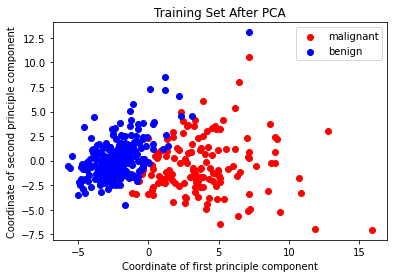

In [9]:
pca = PCA(n_components=2)
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)

X_train_reduced_malignant = np.array([x for x, y in zip(X_train_reduced, y_train) if y == 0])
X_train_reduced_benign = np.array([x for x, y in zip(X_train_reduced, y_train) if y == 1])

plt.scatter(*X_train_reduced_malignant.T, color='red')
plt.scatter(*X_train_reduced_benign.T, color='blue')
plt.title('Training Set After PCA')
plt.legend(['malignant', 'benign'])
plt.xlabel('Coordinate of first principle component')
plt.ylabel('Coordinate of second principle component')
plt.show()

## Performing Logistic Regression

Kami sekarang akan melakukan regresi logistik lagi, tetapi kali ini kami akan melakukan PCA terlebih dahulu pada data dan hanya mempertimbangkan 5 komponen pertama.

In [10]:
pca = PCA(n_components=5)
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)

model = LogisticRegression(random_state=0).fit(X_train_reduced, y_train)
print("Training score: ", f1_score(y_train, model.predict(X_train_reduced)))
print("Testing score: ", f1_score(y_test, model.predict(X_test_reduced)))

Training score:  0.9859719438877755
Testing score:  0.9769585253456222


Kali ini kami mendapatkan skor set tes 97,7%, yang hanya sedikit lebih buruk dari skor asli 98,17%. Namun, dengan hanya menggunakan seperenam dari jumlah data yang awalnya kami gunakan, model kami akan dilatih lebih cepat. Meskipun efeknya mungkin tidak terlihat dalam kasus ini, itu bisa sangat besar dalam aplikasi tertentu, di mana model mungkin membutuhkan waktu berhari-hari untuk melatih sebaliknya.

Sebaiknya Anda memvariasikan nilai `n_components` dalam kode di atas dan melihat bagaimana akurasi set pengujian berubah. Secara khusus, perhatikan bahwa dengan hanya menggunakan satu komponen, kita sudah mendapatkan skor 91,59%. Selain itu, jika kami menggunakan 14 komponen, kami mendapatkan skor 98,17%, yang sama dengan yang kami dapatkan untuk data asli, tetapi menggunakan kurang dari setengah jumlah fitur.

Kami memplot skor pelatihan dan skor tes terhadap jumlah komponen. Perhatikan bahwa sementara skor pelatihan dan skor tes umumnya meningkat dengan peningkatan jumlah komponen, ini tidak selalu harus berlaku. Dalam praktiknya, Anda perlu bereksperimen dengan nilai `n_komponen` yang berbeda dan mencari tahu apa yang berhasil untuk masalah spesifik yang Anda coba selesaikan.

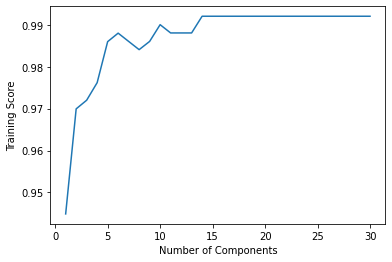

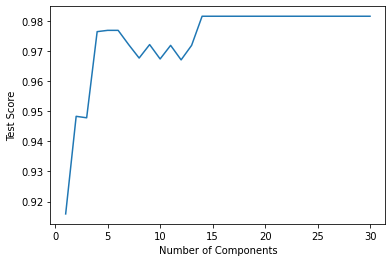

In [11]:
X = np.arange(30) + 1
Y = []

for i in X:
    pca = PCA(n_components=i)
    X_train_reduced = pca.fit_transform(X_train)
    model = LogisticRegression(random_state=0).fit(X_train_reduced, y_train)
    Y.append(f1_score(y_train, model.predict(X_train_reduced)))

plt.plot(X, Y)
plt.xlabel('Number of Components')
plt.ylabel('Training Score')
plt.show()

Y = []

for i in X:
    pca = PCA(n_components=i)
    X_train_reduced = pca.fit_transform(X_train)
    X_test_reduced = pca.transform(X_test)
    model = LogisticRegression(random_state=0).fit(X_train_reduced, y_train)
    Y.append(f1_score(y_test, model.predict(X_test_reduced)))

plt.plot(X, Y)
plt.xlabel('Number of Components')
plt.ylabel('Test Score')
plt.show()